In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


## Hierarchical Clustering and Density Based Models
Lighthouse Labs  
September 24, 2020

Instructor: Socorro Dominguez

## Hierarchical Clustering
**Idea:** In a step-by-step way, merge (or divide) the existing clusters;


## Agglomerative Clustering

- Agglomerative clustering works by merging clusters;
- The overall idea is:
    1. Start with each point as a separate cluster;
 
    2. Merge the clusters that are most similar to each other;
 
    3. Repeat Step 2 until you obtain only one cluster ($n-1$ times).


### How to measure clusters' dissimilarity?

- Since clusters are grouped data points, how can we determine the dissimilarity between two clusters?


- Some strategies:
    - Minimum distance (Single Linkage);
    - Maximum distance (Complete Linkage);
    - Average distance (Average Linkage).

In [2]:
my_data = np.zeros((200,2))
my_data[0:100,0] = np.random.uniform(0,5,size=100)
my_data[0:100,1] = 0.4*my_data[0:100,0]+np.random.normal(scale=.1,size=100)
my_data[100:200,0] = np.random.uniform(0,5,size=100)
my_data[100:200,1] = 0.4*my_data[100:200,0]+np.random.normal(scale=.075,size=100)+1

### Single  and Average Linkage

The single linkage has the ability to strech the cluster shape as it only looks to the minimum distance. The average linkage, on the other hand, looks at the average of distance. Consequently, as the shape of the cluster starts getting longer, the distances along the lines get higher than the distances between the lines (in average).

Text(0, 0.5, '$X_2$')

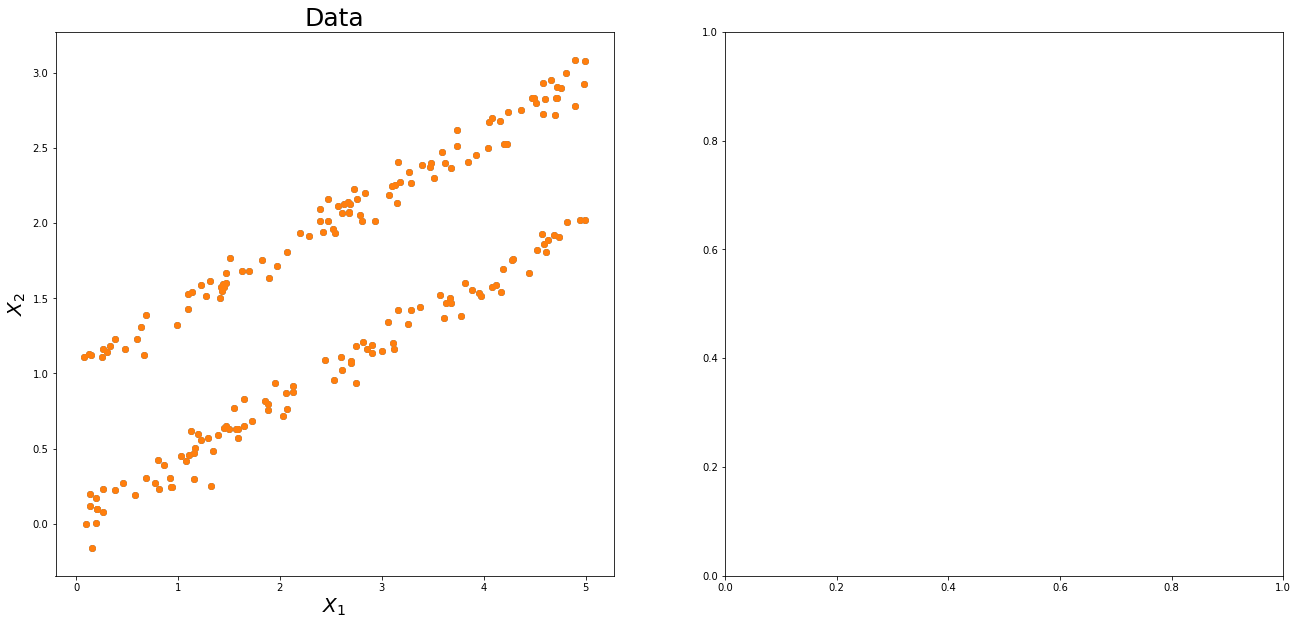

In [3]:
fig, ax = plt.subplots(1,2, figsize=(22,10))
ax[0].scatter(my_data[:,0],my_data[:,1])
ax[0].scatter(my_data[:,0],my_data[:,1]);
ax[0].set_title("Data", fontsize=25)
ax[0].set_xlabel("$X_1$", fontsize=20)
ax[0].set_ylabel("$X_2$", fontsize=20)

In [4]:
single_link = linkage(my_data)

avg_link = linkage(my_data, method='average')

def plot_single_avg_linkage():
    # Plotting the points
    fig, ax = plt.subplots(1,2, figsize=(22,10))
    ax[0].scatter(my_data[:,0],my_data[:,1])
    ax[0].scatter(my_data[:,0],my_data[:,1], c=fcluster(single_link, 2, criterion='maxclust'));
    ax[0].set_title("Single linkage", fontsize=25)
    ax[0].set_xlabel("$X_1$", fontsize=20)
    ax[0].set_ylabel("$X_2$", fontsize=20)
    ax[1].scatter(my_data[:,0],my_data[:,1])
    ax[1].scatter(my_data[:,0],my_data[:,1], c=fcluster(avg_link, 2, criterion='maxclust'));
    ax[1].set_title("Average linkage", fontsize=25);
    ax[1].set_xlabel("$X_1$", fontsize=20);
    ax[1].set_ylabel("$X_2$", fontsize=20);

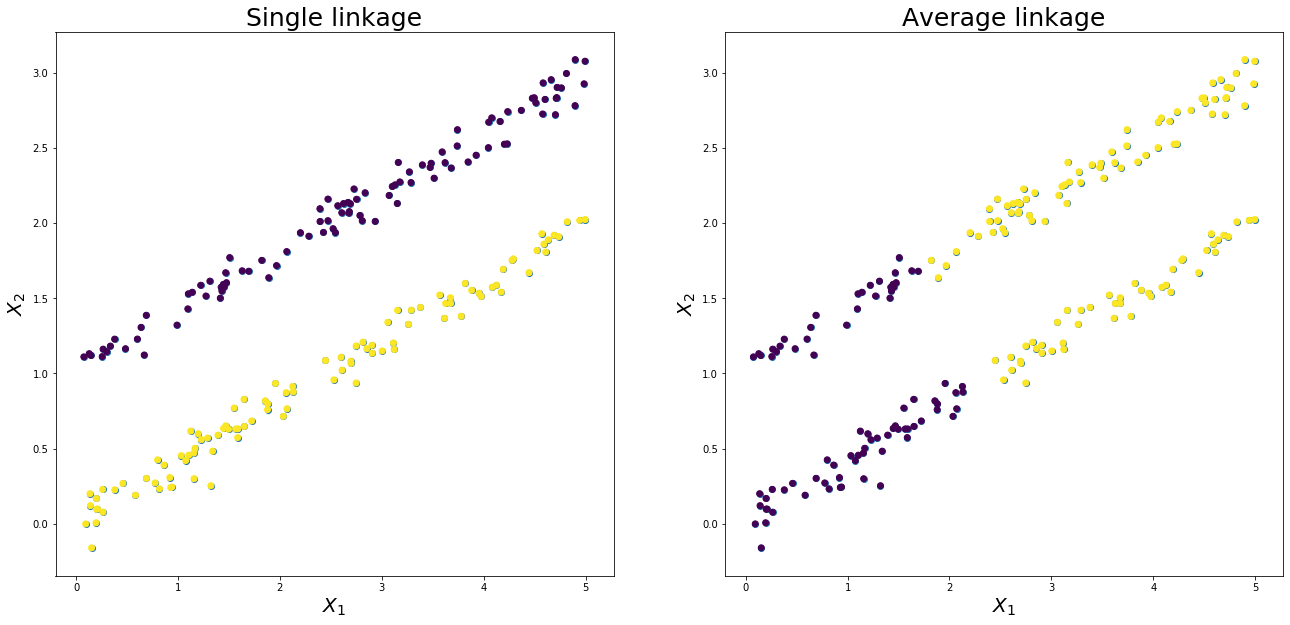

In [5]:
plot_single_avg_linkage()

In [6]:
votes = pd.read_csv("data/subvotes.csv")
votes = votes.pivot(index='country', columns='rcid')
votes = votes[np.sum(np.isnan(votes), axis=1)<1]

# Here we have 17 countries
dist = pd.DataFrame(distance.cdist(votes,votes, metric="cityblock"))
dist.index = votes.index
dist.columns = votes.index

# Just Small trick
dist.values[tuple([np.arange(17)]*2)]=6e2

In [7]:
votes.head()

vote                                               ...            \
rcid      2491 2492 2497 2504 2510 2526 2563 2610 2641 2645  ... 5321 5333   
country                                                      ...             
Australia  1.0  2.0  1.0  3.0  3.0  3.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
Austria    1.0  1.0  1.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
Brazil     1.0  1.0  1.0  1.0  1.0  2.0  2.0  3.0  1.0  1.0  ...  1.0  1.0   
Colombia   1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  ...  1.0  1.0   
Denmark    1.0  1.0  1.0  2.0  2.0  3.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   

                                                   
rcid      5337 5358 5363 5364 5365 5367 5383 5385  
country                                            
Australia  1.0  1.0  2.0  1.0  3.0  1.0  3.0  3.0  
Austria    1.0  1.0  2.0  2.0  2.0  1.0  3.0  3.0  
Brazil     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
Colombia   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
Denmark    1.0  1.0  2.0  2.0  2.0  1.0  3.0  3.0  

[5 rows x 368 columns]

- Let's cluster the countries according to how they voted in the UN;


- We need the pairwise dissimilarities of the clusters;


- We start with each country as a separate cluster; 

In [8]:
dist

country      Australia  Austria  Brazil  Colombia  Denmark  Finland  Italy  \
country                                                                      
Australia        600.0     91.0   229.0     212.0     77.0    101.0   90.0   
Austria           91.0    600.0   148.0     135.0     34.0     32.0   45.0   
Brazil           229.0    148.0   600.0      97.0    174.0    170.0  183.0   
Colombia         212.0    135.0    97.0     600.0    165.0    163.0  176.0   
Denmark           77.0     34.0   174.0     165.0    600.0     32.0   25.0   
Finland          101.0     32.0   170.0     163.0     32.0    600.0   49.0   
Italy             90.0     45.0   183.0     176.0     25.0     49.0  600.0   
Japan            108.0     61.0   183.0     178.0     55.0     65.0   44.0   
Malaysia         328.0    249.0   127.0     124.0    281.0    279.0  284.0   
Netherlands       87.0     50.0   192.0     181.0     22.0     50.0   13.0   
Norway            80.0     35.0   169.0     160.0     15.0     37.0   32.0   
Peru             168.0     87.0    81.0      70.0    117.0    115.0  128.0   
Portugal          91.0     44.0   182.0     173.0     26.0     46.0    7.0   
Spain             97.0     22.0   156.0     147.0     30.0     36.0   31.0   
Sri Lanka        322.0    239.0   119.0     124.0    269.0    259.0  268.0   
UK               102.0     93.0   227.0     222.0     67.0     93.0   54.0   
USA              195.0    274.0   412.0     403.0    252.0    280.0  239.0   

country      Japan  Malaysia  Netherlands  Norway   Peru  Portugal  Spain  \
country                                                                     
Australia    108.0     328.0         87.0    80.0  168.0      91.0   97.0   
Austria       61.0     249.0         50.0    35.0   87.0      44.0   22.0   
Brazil       183.0     127.0        192.0   169.0   81.0     182.0  156.0   
Colombia     178.0     124.0        181.0   160.0   70.0     173.0  147.0   
Denmark       55.0     281.0         22.0    15.0  117.0      26.0   30.0   
Finland       65.0     279.0         50.0    37.0  115.0      46.0   36.0   
Italy         44.0     284.0         13.0    32.0  128.0       7.0   31.0   
Japan        600.0     272.0         41.0    58.0  130.0      41.0   51.0   
Malaysia     272.0     600.0        295.0   276.0  174.0     283.0  263.0   
Netherlands   41.0     295.0        600.0    31.0  135.0      14.0   36.0   
Norway        58.0     276.0         31.0   600.0  112.0      31.0   35.0   
Peru         130.0     174.0        135.0   112.0  600.0     125.0  101.0   
Portugal      41.0     283.0         14.0    31.0  125.0     600.0   26.0   
Spain         51.0     263.0         36.0    35.0  101.0      26.0  600.0   
Sri Lanka    270.0      48.0        279.0   266.0  164.0     267.0  253.0   
UK            76.0     330.0         47.0    74.0  174.0      53.0   79.0   
USA          237.0     501.0        230.0   253.0  353.0     240.0  266.0   

country      Sri Lanka     UK    USA  
country                               
Australia        322.0  102.0  195.0  
Austria          239.0   93.0  274.0  
Brazil           119.0  227.0  412.0  
Colombia         124.0  222.0  403.0  
Denmark          269.0   67.0  252.0  
Finland          259.0   93.0  280.0  
Italy            268.0   54.0  239.0  
Japan            270.0   76.0  237.0  
Malaysia          48.0  330.0  501.0  
Netherlands      279.0   47.0  230.0  
Norway           266.0   74.0  253.0  
Peru             164.0  174.0  353.0  
Portugal         267.0   53.0  240.0  
Spain            253.0   79.0  266.0  
Sri Lanka        600.0  314.0  495.0  
UK               314.0  600.0  189.0  
USA              495.0  189.0  600.0

In [9]:
dist.min(axis=0)

country
Australia       77.0
Austria         22.0
Brazil          81.0
Colombia        70.0
Denmark         15.0
Finland         32.0
Italy            7.0
Japan           41.0
Malaysia        48.0
Netherlands     13.0
Norway          15.0
Peru            70.0
Portugal         7.0
Spain           22.0
Sri Lanka       48.0
UK              47.0
USA            189.0
dtype: float64

- The minimum distance is between Italy and Portugal: 7;


- Step 2: merge the clusters that are most similar to each other:
    - We put Italy and Portugal into the same cluster;


- Next, we recalculate the distances between the clusters;

- But what is the distance between the cluster (Italy, Portugal) and the other countries?


- In the single linkage, we use the minimum distance;


- For example: 
    - d(Italy, Brazil) = 183; 
    - d(Portugal, Brazil) = 182;  
    - Then, the distance between the cluster (Italy, Portugal) and Brazil is 182;

In [10]:
dist2 = dist.copy()
new_cluster = dist2.loc[('Italy','Portugal'),:].min(axis=0).drop(index=['Italy', 'Portugal'])
new_cluster = new_cluster.rename('(Italy, Portugal)')

dist2['(Italy, Portugal)'] = new_cluster
dist2 = dist2.append(new_cluster, ignore_index=False)
dist2.iloc[-1,-1]=600
dist2.loc[('Italy','Portugal', '(Italy, Portugal)'),:]

country            Australia  Austria  Brazil  Colombia  Denmark  Finland  \
country                                                                     
Italy                   90.0     45.0   183.0     176.0     25.0     49.0   
Portugal                91.0     44.0   182.0     173.0     26.0     46.0   
(Italy, Portugal)       90.0     44.0   182.0     173.0     25.0     46.0   

country            Italy  Japan  Malaysia  Netherlands  Norway   Peru  \
country                                                                 
Italy              600.0   44.0     284.0         13.0    32.0  128.0   
Portugal             7.0   41.0     283.0         14.0    31.0  125.0   
(Italy, Portugal)    NaN   41.0     283.0         13.0    31.0  125.0   

country            Portugal  Spain  Sri Lanka    UK    USA  (Italy, Portugal)  
country                                                                        
Italy                   7.0   31.0      268.0  54.0  239.0                NaN  
Portugal              600.0   26.0      267.0  53.0  240.0                NaN  
(Italy, Portugal)       NaN   26.0      267.0  53.0  239.0              600.0

In [11]:
# Now we remove Italy and Portugal, since we don't have these two clusters anymore
# But only the (Italy, Portugal) cluster;

dist2 = dist2.drop(index=['Italy', 'Portugal'])
dist2 = dist2.drop('Italy', axis=1)
dist2 = dist2.drop('Portugal', axis=1)
dist2

country            Australia  Austria  Brazil  Colombia  Denmark  Finland  \
country                                                                     
Australia              600.0     91.0   229.0     212.0     77.0    101.0   
Austria                 91.0    600.0   148.0     135.0     34.0     32.0   
Brazil                 229.0    148.0   600.0      97.0    174.0    170.0   
Colombia               212.0    135.0    97.0     600.0    165.0    163.0   
Denmark                 77.0     34.0   174.0     165.0    600.0     32.0   
Finland                101.0     32.0   170.0     163.0     32.0    600.0   
Japan                  108.0     61.0   183.0     178.0     55.0     65.0   
Malaysia               328.0    249.0   127.0     124.0    281.0    279.0   
Netherlands             87.0     50.0   192.0     181.0     22.0     50.0   
Norway                  80.0     35.0   169.0     160.0     15.0     37.0   
Peru                   168.0     87.0    81.0      70.0    117.0    115.0   
Spain                   97.0     22.0   156.0     147.0     30.0     36.0   
Sri Lanka              322.0    239.0   119.0     124.0    269.0    259.0   
UK                     102.0     93.0   227.0     222.0     67.0     93.0   
USA                    195.0    274.0   412.0     403.0    252.0    280.0   
(Italy, Portugal)       90.0     44.0   182.0     173.0     25.0     46.0   

country            Japan  Malaysia  Netherlands  Norway   Peru  Spain  \
country                                                                 
Australia          108.0     328.0         87.0    80.0  168.0   97.0   
Austria             61.0     249.0         50.0    35.0   87.0   22.0   
Brazil             183.0     127.0        192.0   169.0   81.0  156.0   
Colombia           178.0     124.0        181.0   160.0   70.0  147.0   
Denmark             55.0     281.0         22.0    15.0  117.0   30.0   
Finland             65.0     279.0         50.0    37.0  115.0   36.0   
Japan              600.0     272.0         41.0    58.0  130.0   51.0   
Malaysia           272.0     600.0        295.0   276.0  174.0  263.0   
Netherlands         41.0     295.0        600.0    31.0  135.0   36.0   
Norway              58.0     276.0         31.0   600.0  112.0   35.0   
Peru               130.0     174.0        135.0   112.0  600.0  101.0   
Spain               51.0     263.0         36.0    35.0  101.0  600.0   
Sri Lanka          270.0      48.0        279.0   266.0  164.0  253.0   
UK                  76.0     330.0         47.0    74.0  174.0   79.0   
USA                237.0     501.0        230.0   253.0  353.0  266.0   
(Italy, Portugal)   41.0     283.0         13.0    31.0  125.0   26.0   

country            Sri Lanka     UK    USA  (Italy, Portugal)  
country                                                        
Australia              322.0  102.0  195.0               90.0  
Austria                239.0   93.0  274.0               44.0  
Brazil                 119.0  227.0  412.0              182.0  
Colombia               124.0  222.0  403.0              173.0  
Denmark                269.0   67.0  252.0               25.0  
Finland                259.0   93.0  280.0               46.0  
Japan                  270.0   76.0  237.0               41.0  
Malaysia                48.0  330.0  501.0              283.0  
Netherlands            279.0   47.0  230.0               13.0  
Norway                 266.0   74.0  253.0               31.0  
Peru                   164.0  174.0  353.0              125.0  
Spain                  253.0   79.0  266.0               26.0  
Sri Lanka              600.0  314.0  495.0              267.0  
UK                     314.0  600.0  189.0               53.0  
USA                    495.0  189.0  600.0              239.0  
(Italy, Portugal)      267.0   53.0  239.0              600.0

In [12]:
dist2.min(axis=0)
# Now the closest distance is between the cluster (Italy, Portugal) and Netherland
# Same Process

country
Australia             77.0
Austria               22.0
Brazil                81.0
Colombia              70.0
Denmark               15.0
Finland               32.0
Japan                 41.0
Malaysia              48.0
Netherlands           13.0
Norway                15.0
Peru                  70.0
Spain                 22.0
Sri Lanka             48.0
UK                    47.0
USA                  189.0
(Italy, Portugal)     13.0
dtype: float64

- By doing this iteratively, we will end up with only one cluster;


- We are interested in the results in the middle, with a reasonable number of clusters;


- We can use any distance metric;


- Different distances that provide the same orderings will not affect single linkages;

In [13]:
def plot_dendrogram(w,h, method, metric):

    Z = linkage(votes, method=method, metric=metric)
    w = 22
    h = 10
    fig, ax = plt.subplots(figsize=(w,h))
    dendrogram(Z, labels = votes.index, ax=ax);
    ax = plt.gca()
    ax.set_ylabel("Distance", fontsize=w)
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize=w);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=w)
    

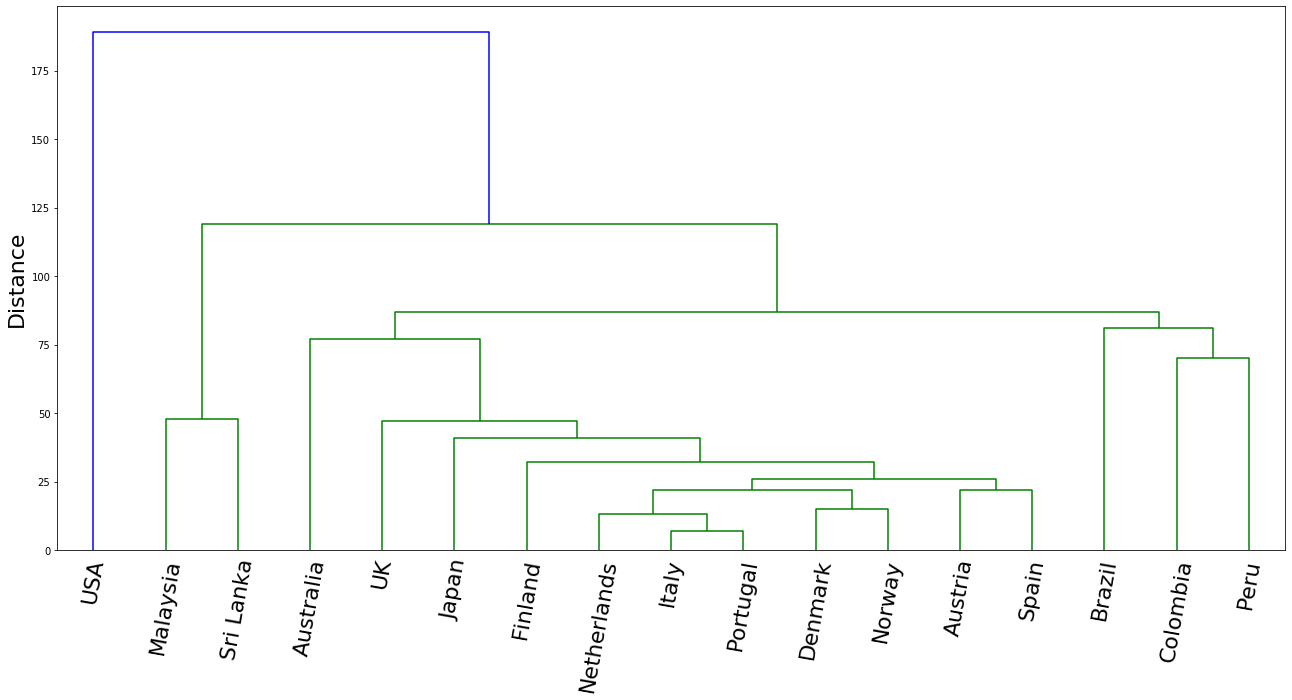

In [14]:
plot_dendrogram(22, 10, 'single', 'cityblock')

- The Average Linkage is quite similar to the Single Linkage;


- The difference is on how we define the distance between clusters;


- In the Single Linkage we used minimum, in the Average Linkage we use the average between all pairs of elements between clusters;


- Changes in the distance metrics may affect the Average linkage, even if it doesn't change the ordering;

In [15]:
dist2 = dist.copy()
new_cluster = dist2.loc[('Italy','Portugal'),:].mean(axis=0).drop(index=['Italy', 'Portugal'])
new_cluster = new_cluster.rename('(Italy, Portugal)')

dist2['(Italy, Portugal)'] = new_cluster
dist2 = dist2.append(new_cluster, ignore_index=False)
dist2.iloc[-1,-1]=600
dist2.loc[('Italy','Portugal', '(Italy, Portugal)'),:]

country            Australia  Austria  Brazil  Colombia  Denmark  Finland  \
country                                                                     
Italy                   90.0     45.0   183.0     176.0     25.0     49.0   
Portugal                91.0     44.0   182.0     173.0     26.0     46.0   
(Italy, Portugal)       90.5     44.5   182.5     174.5     25.5     47.5   

country            Italy  Japan  Malaysia  Netherlands  Norway   Peru  \
country                                                                 
Italy              600.0   44.0     284.0         13.0    32.0  128.0   
Portugal             7.0   41.0     283.0         14.0    31.0  125.0   
(Italy, Portugal)    NaN   42.5     283.5         13.5    31.5  126.5   

country            Portugal  Spain  Sri Lanka    UK    USA  (Italy, Portugal)  
country                                                                        
Italy                   7.0   31.0      268.0  54.0  239.0                NaN  
Portugal              600.0   26.0      267.0  53.0  240.0                NaN  
(Italy, Portugal)       NaN   28.5      267.5  53.5  239.5              600.0

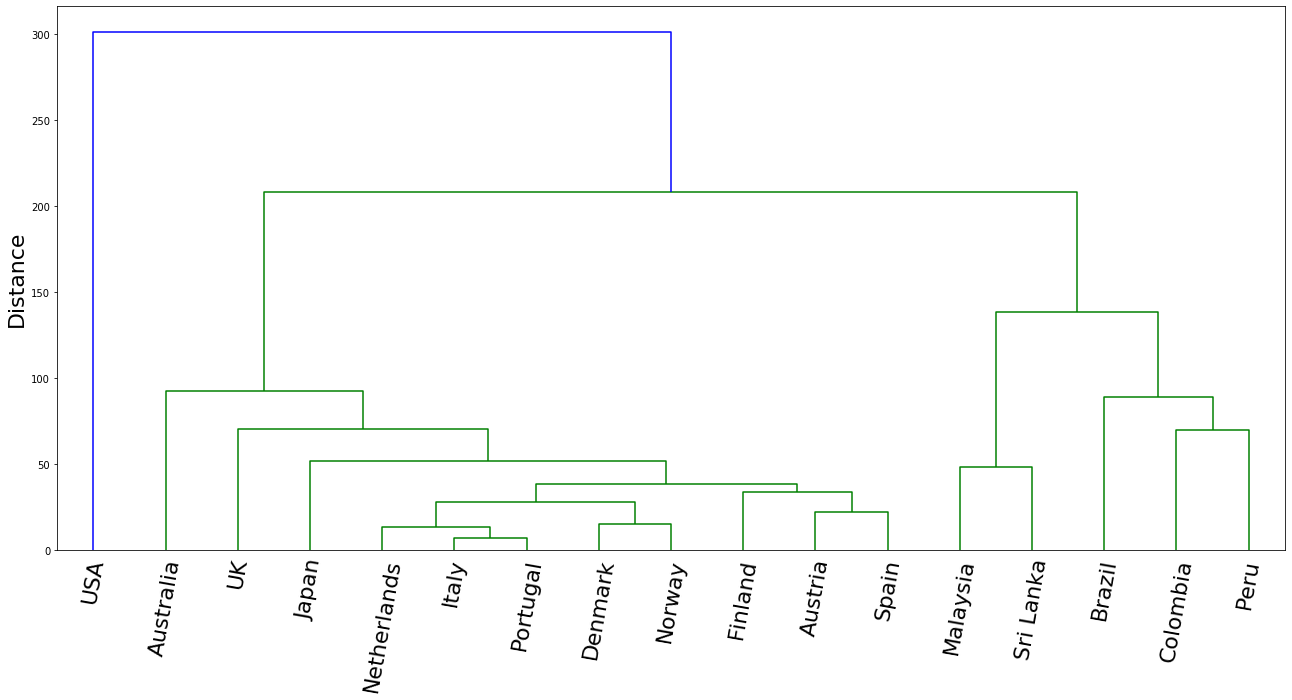

In [16]:
#Dendogram using average linkage
plot_dendrogram(22,10,'average', 'cityblock')

- The Complete Linkage uses the maximum distance between all pair of elements (one element from each clusters); 


- Like the Single Linkage, changes in the distance metric that doesn't affect the ordering will not affect the Complete Linkage;

In [17]:
dist2 = dist.copy()
new_cluster = dist2.loc[('Italy','Portugal'),:].max(axis=0).drop(index=['Italy', 'Portugal'])
new_cluster = new_cluster.rename('(Italy, Portugal)')

dist2['(Italy, Portugal)'] = new_cluster
dist2 = dist2.append(new_cluster, ignore_index=False)
dist2.iloc[-1,-1]=600
dist2.loc[('Italy','Portugal', '(Italy, Portugal)'),:]

country            Australia  Austria  Brazil  Colombia  Denmark  Finland  \
country                                                                     
Italy                   90.0     45.0   183.0     176.0     25.0     49.0   
Portugal                91.0     44.0   182.0     173.0     26.0     46.0   
(Italy, Portugal)       91.0     45.0   183.0     176.0     26.0     49.0   

country            Italy  Japan  Malaysia  Netherlands  Norway   Peru  \
country                                                                 
Italy              600.0   44.0     284.0         13.0    32.0  128.0   
Portugal             7.0   41.0     283.0         14.0    31.0  125.0   
(Italy, Portugal)    NaN   44.0     284.0         14.0    32.0  128.0   

country            Portugal  Spain  Sri Lanka    UK    USA  (Italy, Portugal)  
country                                                                        
Italy                   7.0   31.0      268.0  54.0  239.0                NaN  
Portugal              600.0   26.0      267.0  53.0  240.0                NaN  
(Italy, Portugal)       NaN   31.0      268.0  54.0  240.0              600.0

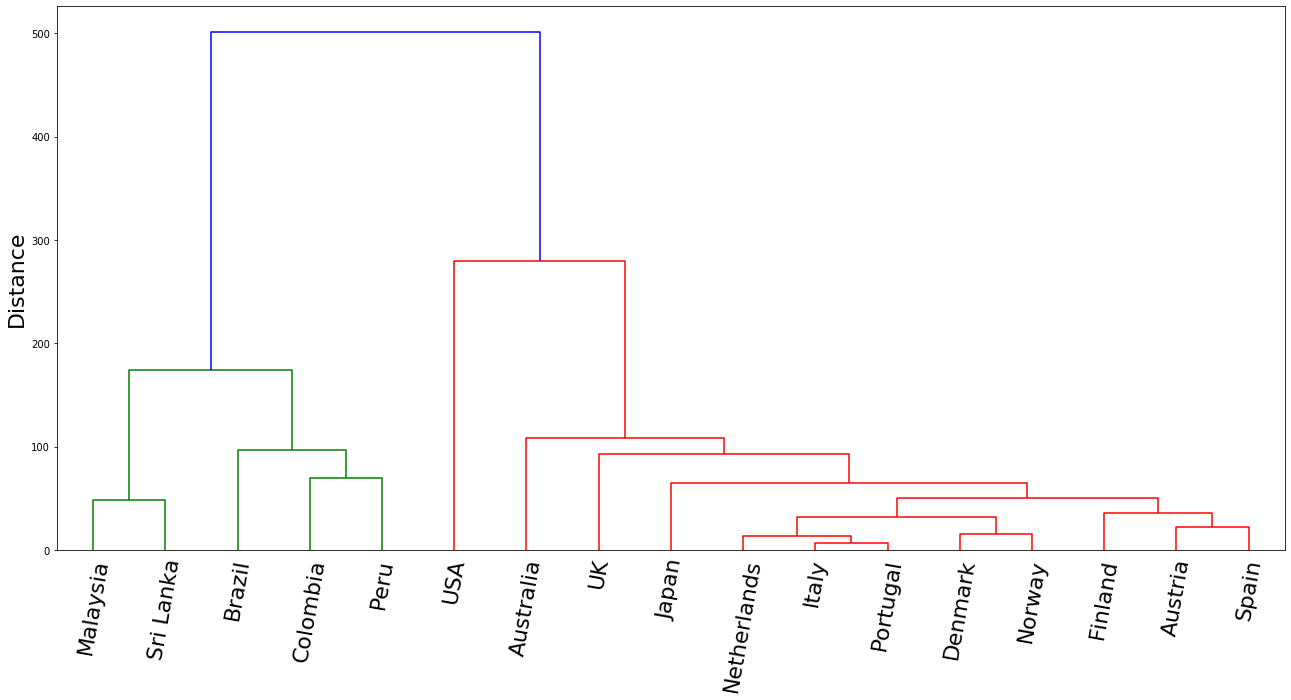

In [18]:
plot_dendrogram(22, 10, 'complete', 'cityblock')

## DBSCAN
**Idea:** uses the density of points in a region to determine clusters;

In [19]:
# Generating sample datasets for a motivating figure;
x1 = np.random.multivariate_normal(mean = [0,0], cov=np.diag([3,3]), size = 200)
x1 = np.concatenate((x1,np.random.multivariate_normal(mean = [-7,-7], cov=np.diag([1,1]), size = 50)))
x1 = np.concatenate((x1,np.random.multivariate_normal(mean = [7,-7], cov=np.diag([1,1]), size = 50)))
x1 = np.concatenate((x1,np.random.multivariate_normal(mean = [9,4], cov=np.diag([1,1]), size = 50)))

x2 = datasets.make_circles(n_samples=200, noise=.06, factor=.4)[0]

x3 = np.random.uniform(-1,1,size=100)
x3 = np.column_stack((x3,x3**3+np.random.normal(scale=.08,size=100)))
x3 = np.concatenate((x3,np.random.multivariate_normal(mean = [-1,1], cov=np.diag([.025,.025]), size = 50)))
x3 = np.concatenate((x3,np.random.multivariate_normal(mean = [1,-1], cov=np.diag([.025,.025]), size = 50)))
x3 = np.concatenate((x3,np.column_stack((np.random.uniform(-2,2,size=20),np.random.uniform(-2,2,size=20)))))
datasets.make_blobs()

def plot_example_density(w,h):
    fig, ax = plt.subplots(1,3,figsize=(w,h))
    ax[0].scatter(x1[:,0],x1[:,1]);
    ax[1].scatter(x2[:,0],x2[:,1]);
    ax[2].scatter(x3[:,0],x3[:,1]);
    ax[0].set_title("How many clusters?", fontsize=w)
    ax[1].set_title("How many clusters?", fontsize=w)
    ax[2].set_title("How many clusters?", fontsize=w)


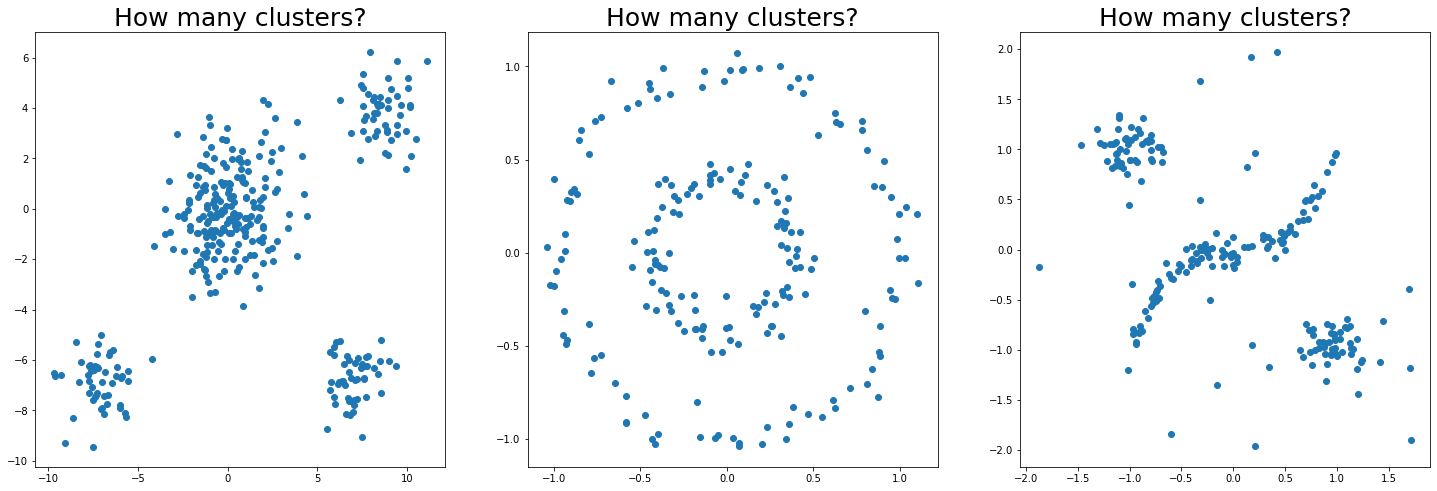

In [20]:
plot_example_density(25,8)

- The idea is that, inside the clusters we have higher density of points than outsides the clusters;
<br>

- This interpretation allows us to consider some points as noise, i.e., that doesn't belong to any cluster (see the third figure above);
<br>

- But what is a high density region of points?

## Density of points:

- What we do is to check how many points we have in a given region;
<br>

- For example, we fix a point $\mathbf{a}$ and check how many points are close to $\mathbf{a}$;
<br>

- But, again, how close? According to what distance?
    - See where this is going? hyperparameters!

In [21]:
def get_mahalanobis_params_patches(cov, dist):
    # Finding the contours for which the mahalanobis distance is the same.
    S = cov
    eig = np.linalg.eig(S)
    e1 = eig[1][:,0] # First eigenvector
    e2 = eig[1][:,1] # Second eigenvector

    # Parameters for the ellipse
    angle = np.sum(eig[1][:,0]*eig[1][:,1])/(np.linalg.norm(eig[1][:,0]))
    width = 2*dist * np.sqrt(eig[0][0])
    height = 2*dist * np.sqrt(eig[0][1])
    return angle, width, height

- A point $\mathbf{p}$ that has more than `min_samples` neighbor points is called **core** point;


- A cluster is formed by the core points and their neighbors;

In [22]:
def plot_dbscan(w, h, eps, min_samples, metric):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(x1)

    plt.figure(figsize=(w,h))
    #plt.scatter(x1[:,0], x1[:,1], c="green", label="boundary points")
    #plt.scatter(x1[db.core_sample_indices_ ,0], x1[db.core_sample_indices_ ,1], c="black",zorder=10, label="core points")
    #plt.scatter(x1[db.labels_==-1,0], x1[db.labels_==-1,1], color='red', label="noise points")

    plt.scatter(x1[:,0], x1[:,1], c=db.labels_, label="boundary points")
    plt.scatter(x1[db.core_sample_indices_ ,0], x1[db.core_sample_indices_ ,1],c=db.labels_[db.core_sample_indices_], s=100, label="core points")
    plt.scatter(x1[db.labels_==-1,0], x1[db.labels_==-1,1], c="red", label="noise points")
    plt.legend(fontsize=w);

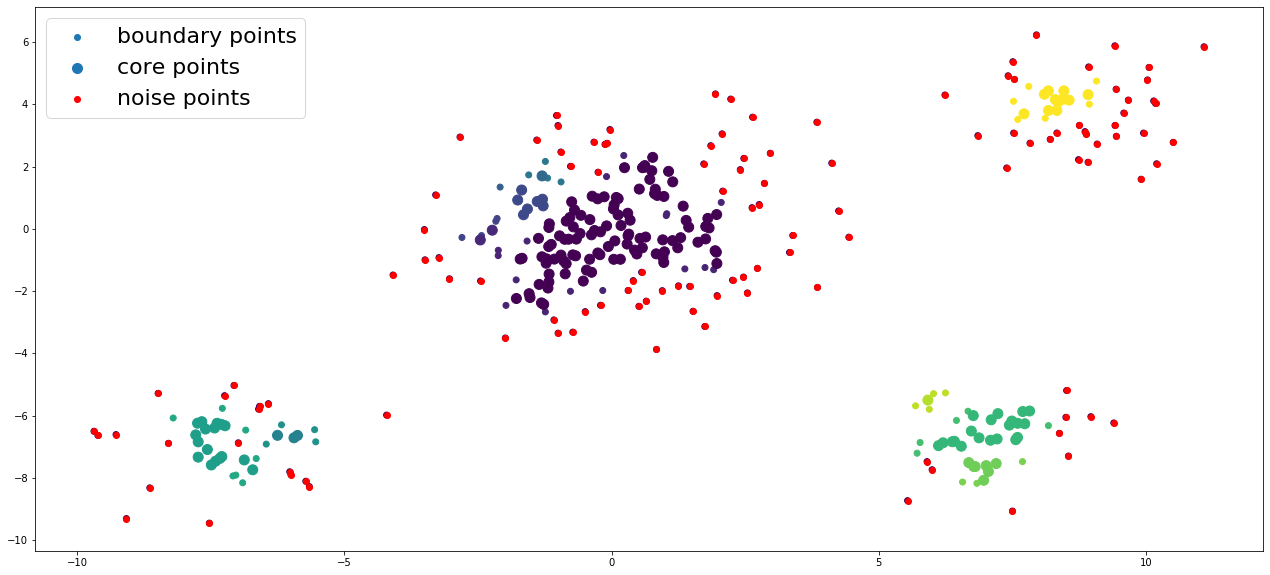

In [23]:
plot_dbscan(22, 10, eps=.5, min_samples=5, metric='euclidean')

# Questions?